# Track, analyze Hgb-A1c results from 2012 on

In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame as DF, Series as Ser
from matplotlib import pyplot as plt
import datetime
from datetime import date
#from convert_yyyymmdd_datestrings import date_converter

In [6]:
# Convert the datestrings to days from 0001/01/01 using module datetime
'''
def to_days(t):
    yr, mo, da = t//10000, (t%10000)//100, t%100
    date_from_input = datetime.date(yr, mo, da)
    return date_from_input.toordinal() #date_from_input
    '''

data_all = pd.read_csv("A1c-data.csv")
datetimes = Ser([date.fromisoformat(str(d)) for d in list(data_all['Date'])])
days_ordinal = Ser([date.toordinal(d) for d in list(datetimes)])

data_days = pd.concat([datetimes, days_ordinal, data_all['A1c'], data_all['Source']], axis=1)
data_days.columns = ['Datetime', 'Day-Ordinal', 'A1c', 'Source']
pd.concat([data_days.head(3), data_days.tail(3)])

,Datetime,Day-Ordinal,A1c,Source
0,2012-07-30,734714,5.1,Henry Ford
1,2012-10-09,734785,5.5,Henry Ford
2,2015-09-02,735843,5.6,Henry Ford
15,2024-03-29,738974,6.4,Parkview
16,2024-04-24,739000,6.1,Lutheran
17,2024-06-01,739038,6.4,Parkview


In [7]:
# Fit some estimators to the data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (PolynomialFeatures, 
    SplineTransformer)
from sklearn.pipeline import make_pipeline

X, y = DF(data_days['Day-Ordinal']), DF(data_days['A1c'])
lr = LinearRegression()
lr.fit(X, y)
lr_pred = lr.predict(X)

splinemodel = make_pipeline(SplineTransformer(degree=3, 
    n_knots=2), LinearRegression())
splinemodel.fit(X, y)
spline_predictions = splinemodel.predict(X)

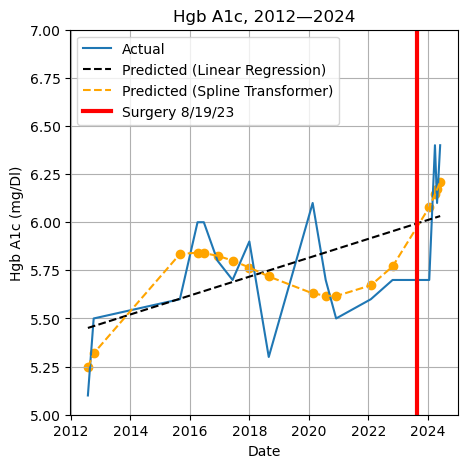

Accuracy, linear model: 0.301
Accuracy, spline model: 0.573


In [8]:
# Plot the data, actual and predicted
# matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
from date_time_string import date_time_string
fig = plt.figure(figsize=(5,5))
#axes = plt.gca()
ymin, ymax = (5, 7)
plt.plot(data_days['Datetime'], data_days['A1c'], label='Actual')
plt.plot(data_days['Datetime'], lr_pred, 'k--', 
         label='Predicted (Linear Regression)')
plt.plot(data_days['Datetime'], spline_predictions, '--', 
         color='orange', label='Predicted (Spline Transformer)')
plt.scatter(data_days['Datetime'], spline_predictions, color='orange')

# Plot surgery date
surg_date = date(2023, 8, 19)
plt.plot([surg_date, surg_date], [ymin, ymax],
        color='red', label='Surgery 8/19/23', linewidth=3)
plt.legend()
plt.grid()
plt.ylim(ymin, ymax)
plt.xlabel("Date")
plt.ylabel("Hgb A1c (mg/Dl)")
plt.title("Hgb A1c, 2012—2024")
plt.savefig("A1c-predictions-" + date_time_string() + ".png")
plt.show()

# Print accuracy of each model
print(f"Accuracy, linear model: {lr.score(X, y):0.3f}")
print(f"Accuracy, spline model: {splinemodel.score(X, y):0.3f}")